<a href="https://colab.research.google.com/github/mmartigani/IA/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
prueba = pd.read_csv('train.csv')

In [3]:
prueba.head(7)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000
5   6          50       RL  ...        WD         Normal    143000
6   7          20       RL  ...        WD         Normal    307000

[7 rows x 81 columns]

In [4]:
prueba.shape

(1460, 81)

In [5]:
prueba[['Id','Street']]

Id Street
0        1   Pave
1        2   Pave
2        3   Pave
3        4   Pave
4        5   Pave
...    ...    ...
1455  1456   Pave
1456  1457   Pave
1457  1458   Pave
1458  1459   Pave
1459  1460   Pave

[1460 rows x 2 columns]

In [7]:
prueba['SalePrice'].mean()

180921.19589041095

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

In [9]:
prueba['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


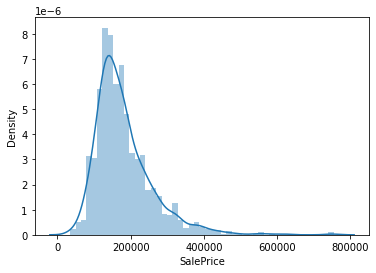

In [10]:
sns.distplot(prueba['SalePrice'])

In [11]:
prueba['SalePrice'].skew()

1.8828757597682129

In [12]:
prueba['SalePrice'].kurt()

6.536281860064529

In [14]:
var = 'GrLivArea'

In [15]:
data = pd.concat([prueba['SalePrice'], prueba[var]], axis =1)

In [16]:
data.head(7)

SalePrice  GrLivArea
0     208500       1710
1     181500       1262
2     223500       1786
3     140000       1717
4     250000       2198
5     143000       1362
6     307000       1694

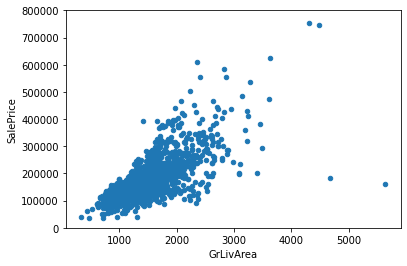

In [17]:
data.plot.scatter(x=var, y= 'SalePrice', ylim=(0,800000));

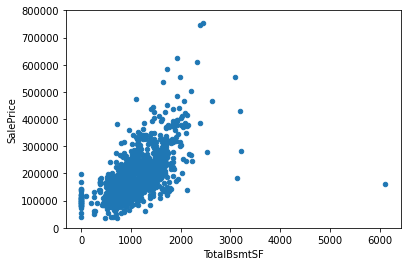

In [18]:
var = 'TotalBsmtSF'
data = pd.concat([prueba['SalePrice'], prueba[var]],axis=1)
data.plot.scatter(x=var , y='SalePrice', ylim=(0,800000))

In [21]:
var = 'OverallQual'

In [22]:
data = pd.concat([prueba['SalePrice'], prueba[var]], axis=1)

In [23]:
data.head(5)

SalePrice  OverallQual
0     208500            7
1     181500            6
2     223500            7
3     140000            7
4     250000            8

(-0.5, 9.5, 0.0, 800000.0)

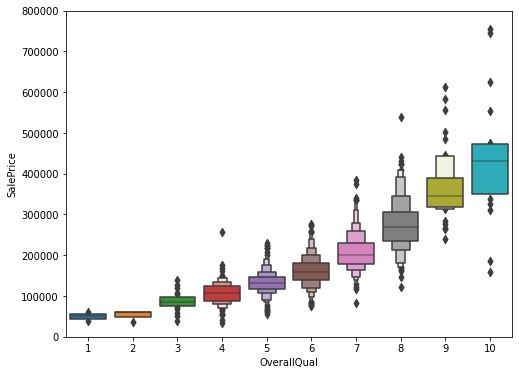

In [25]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxenplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

In [26]:
var = 'YearBuilt'

In [27]:
data = pd.concat([prueba['SalePrice'],prueba[var]], axis=1)

In [28]:
data.head(5)

SalePrice  YearBuilt
0     208500       2003
1     181500       1976
2     223500       2001
3     140000       1915
4     250000       2000

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

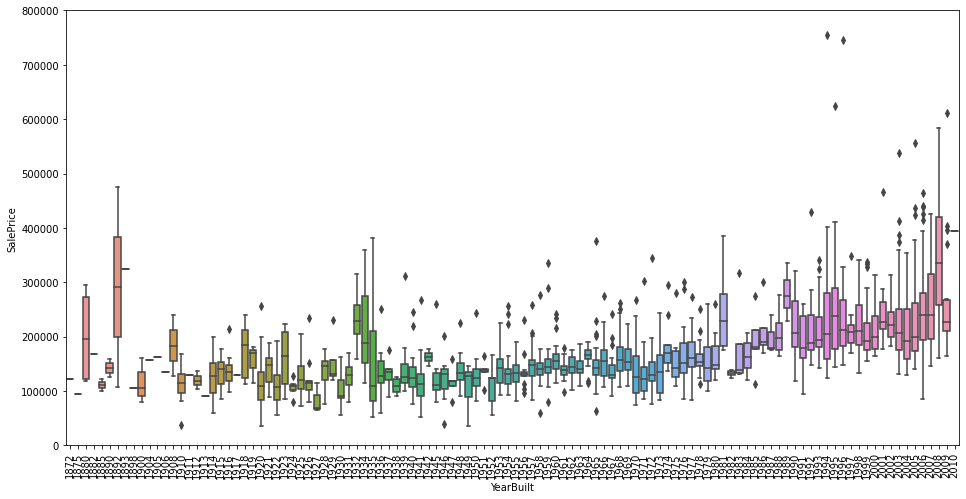

In [30]:
f, ax = plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

In [31]:
corrmat = prueba.corr()

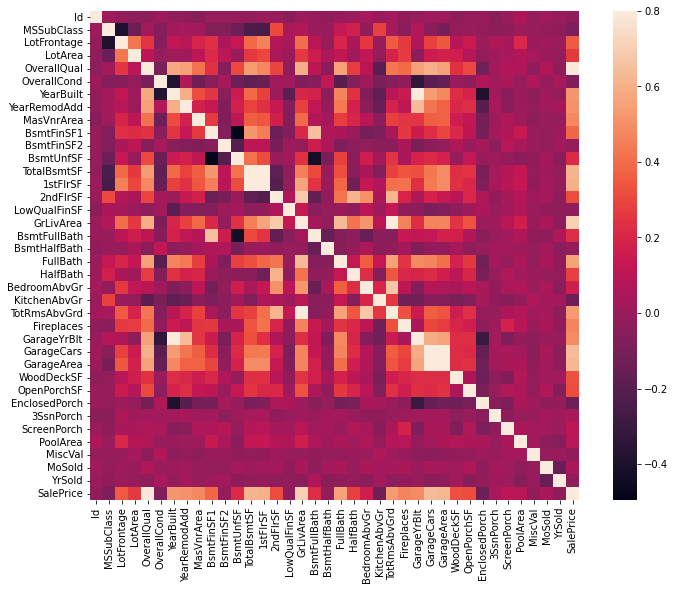

In [32]:
f ,ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)



In [33]:
k=10

In [35]:
cols= corrmat.nlargest(k,'SalePrice')['SalePrice'].index

In [36]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [37]:
cm = np.corrcoef(prueba[cols].values.T)

In [38]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

In [39]:
sns.set(font_scale=1.25)

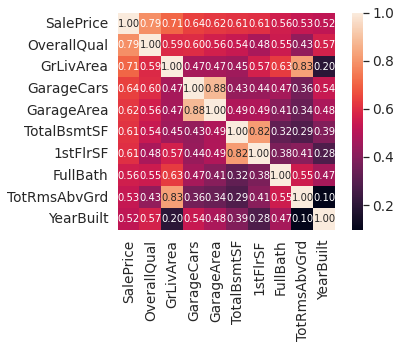

In [44]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt=".2f", annot_kws={"size":10,},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [45]:
sns.set()

In [48]:
cols=['SalePrice', 'OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


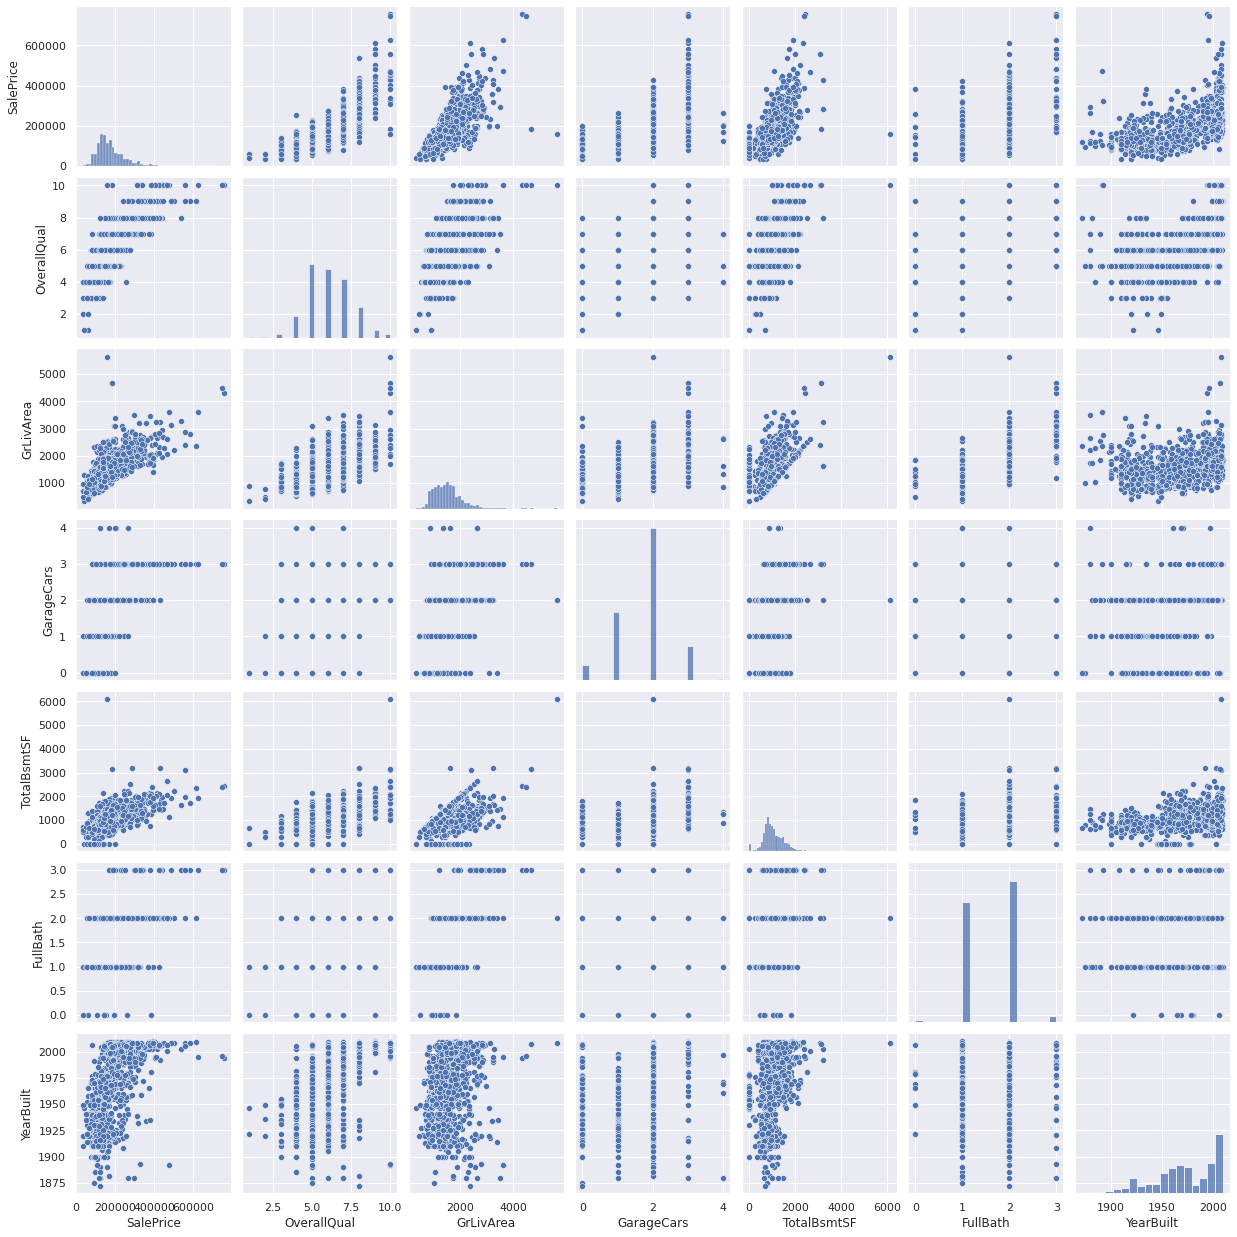

In [49]:
sns.pairplot(prueba[cols], size=2.5)
plt.show()